# 10. Geometrical transformations of images

[Original website](https://scikit-image.org/docs/stable/user_guide/geometrical_transform.html)

In [1]:
import skimage as ski
import matplotlib.pyplot as plt
import numpy as np

In [2]:
astronaut = ski.data.astronaut()
astronaut.shape

(512, 512, 3)

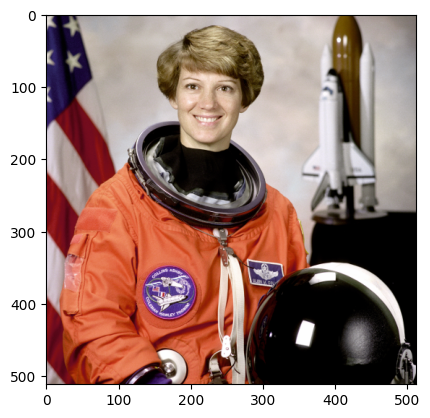

In [3]:
plt.imshow(astronaut)
plt.show()

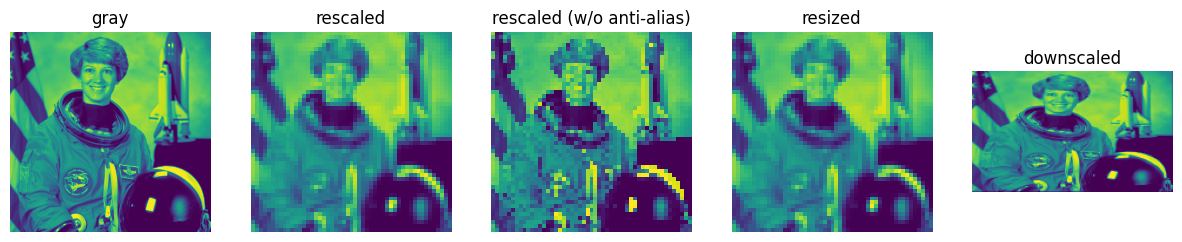

In [4]:
img_gray = ski.color.rgb2gray(astronaut)
img_rescaled = ski.transform.rescale(img_gray, 0.1)
img_rescaled_noantialiasing = ski.transform.rescale(img_gray, 0.1, anti_aliasing=False)
img_resized = ski.transform.resize(
    img_gray, (img_gray.shape[0] // 10, img_gray.shape[1] // 10)
)
img_downscaled = ski.transform.downscale_local_mean(img_gray, (5, 3))
fig, axes = plt.subplots(ncols=5, figsize=(15, 3))
axes = axes.flatten()
for i, (lbl, img) in enumerate(
    [
        ("gray", img_gray),
        ("rescaled", img_rescaled),
        ("rescaled (w/o anti-alias)", img_rescaled_noantialiasing),
        ("resized", img_resized),
        ("downscaled", img_downscaled),
    ]
):
    axes[i].imshow(img)
    axes[i].set_title(lbl)
    axes[i].set_axis_off()
plt.show()

## Projective transforms (homographies)

> Homographies are transformations of a Euclidean space that preserve the alignment of points.

A projective transformation can be performed using projection parameters such as scale, shear, rotation, and translation, or by providing a transformation matrix. 
An example of the former is shown below:

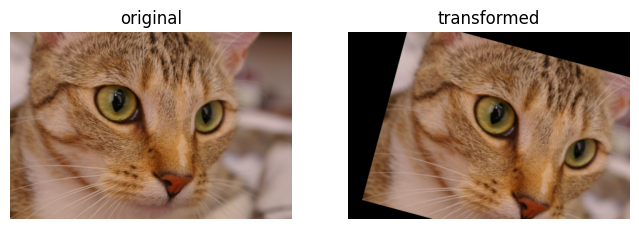

In [5]:
transform = ski.transform.EuclideanTransform(
    rotation=np.pi / 12, translation=(100, -20)
)
cat = ski.data.chelsea()
cat_tformed = ski.transform.warp(cat, transform.inverse)

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
axes = axes.flatten()
for i, (lbl, img) in enumerate([("original", cat), ("transformed", cat_tformed)]):
    axes[i].imshow(img)
    axes[i].set_title(lbl)
    axes[i].set_axis_off()
plt.show()

There is an `estimate()` method for determining the transformation parameters from coordinates of the pre- and post- transform images. 
This can be useful for accounting for known distortion or angles of images.
Below is an example, but there are more tutorials on the subject in the documentation.

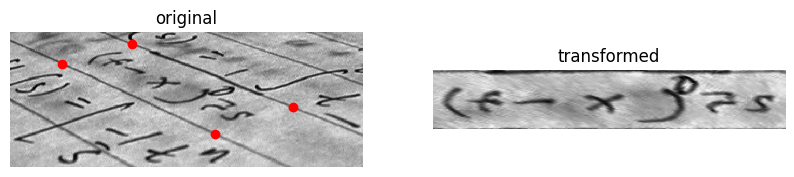

In [6]:
text_image = ski.exposure.equalize_adapthist(ski.data.text())

src = np.array([[0, 0], [0, 50], [300, 50], [300, 0]])
dst = np.array([[155, 15], [65, 40], [260, 130], [360, 95]])

pred_transform = ski.transform.ProjectiveTransform()
pred_transform.estimate(src, dst)
warped = ski.transform.warp(text_image, pred_transform, output_shape=(50, 300))

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
axes = axes.flatten()
axes[0].imshow(text_image, cmap="gray")
axes[0].set_title("original")
axes[1].imshow(warped, cmap="gray")
axes[1].set_title("transformed")

axes[0].scatter(dst[:, 0], dst[:, 1], c="r")

for ax in axes:
    ax.set_axis_off()

plt.show()